# <p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>


# WELCOME!

## Introduction
Welcome to "***AutoScout Data Analysis Project***". This is the capstone project of ***Data Analysis*** Module. **Auto Scout** data which using for this project, scraped from the on-line car trading company in 2019, contains many features of 9 different car models. In this project, you will have the opportunity to apply many commonly used algorithms for Data Cleaning and Exploratory Data Analysis by using many Python libraries such as Numpy, Pandas, Matplotlib, Seaborn, Scipy you will analyze clean dataset.

The project consists of 3 parts:
* First part is related with 'data cleaning'. It deals ed with 'handling outliers of data' via Visualisation libraries. Some insights are extracted.
with Incorrect Headers, Incorrect Format, Anomalies, Dropping useless columns.
* Second part is related with 'filling data'. It deals with Missing Values. Categorical to numeric transformation is done.
* Third part is relat

# Handling with Outliers

Outliers are unusual values in your dataset, and they can distort statistical analyses and violate their assumptions. ... Outliers increase the variability in your data, which decreases statistical power. Consequently, excluding outliers can cause your results to become statistically significant. Outliers can have a disproportionate effect on statistical results, such as the mean, which can result in misleading interpretations. In this case, the mean value makes it seem that the data values are higher than they really are

In [118]:
import numpy as np
import pandas as pd
import seaborn as sns 
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize


import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")



%matplotlib inline
# %matplotlib notebook

pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows',1000)

# pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.float_format', lambda x: '%.3f' % x)

plt.rcParams["figure.figsize"] = (10,6)


In [119]:
df= pd.read_csv("filled_scout.csv")

In [120]:
df.head()

Make_Model Body_Type  Price               Vat        Km   Hp_Kw  Type  \
0    Audi A1    Sedans  15770    VAT deductible 56013.000  66.000  Used   
1    Audi A1    Sedans  14500  Price negotiable 80000.000 141.000  Used   
2    Audi A1    Sedans  14640    VAT deductible 83450.000  85.000  Used   
3    Audi A1    Sedans  14500    VAT deductible 73000.000  66.000  Used   
4    Audi A1    Sedans  16790    VAT deductible 16200.000  66.000  Used   

   Previous_Owners  Inspection_New Paint_Type  Nr_Of_Doors  Nr_Of_Seats  \
0            2.000               1   Metallic        5.000        5.000   
1            1.000               0   Metallic        3.000        4.000   
2            1.000               0   Metallic        4.000        4.000   
3            1.000               0   Metallic        3.000        4.000   
4            1.000               1   Metallic        5.000        5.000   

  Gearing_Type  Displacement_cc   Weight Drive_Chain     Fuel  \
0    Automatic         1422.000 1220.000       front   Diesel   
1    Automatic         1798.000 1255.000       front  Benzine   
2    Automatic         1598.000 1135.000       front   Diesel   
3    Automatic         1422.000 1195.000       front   Diesel   
4    Automatic         1422.000 1135.000       front   Diesel   

                                 Comfort_Convenience  \
0  Air conditioning,Armrest,Automatic climate con...   
1  Air conditioning,Automatic climate control,Hil...   
2  Air conditioning,Cruise control,Electrical sid...   
3  Air suspension,Armrest,Auxiliary heating,Elect...   
4  Air conditioning,Armrest,Automatic climate con...   

                                 Entertainment_Media  \
0  Bluetooth,Hands-free equipment,On-board comput...   
1  Bluetooth,Hands-free equipment,On-board comput...   
2                              MP3,On-board computer   
3  Bluetooth,CD player,Hands-free equipment,MP3,O...   
4  Bluetooth,CD player,Hands-free equipment,MP3,O...   

                                              Extras  \
0     Alloy wheels,Catalytic Converter,Voice Control   
1  Alloy wheels,Sport seats,Sport suspension,Voic...   
2                         Alloy wheels,Voice Control   
3             Alloy wheels,Sport seats,Voice Control   
4  Alloy wheels,Sport package,Sport suspension,Vo...   

                                     Safety_Security  Gears   Age  \
0  ABS,Central door lock,Daytime running lights,D...  7.000 3.000   
1  ABS,Central door lock,Central door lock with r...  7.000 2.000   
2  ABS,Central door lock,Daytime running lights,D...  7.000 3.000   
3  ABS,Alarm system,Central door lock with remote...  6.000 3.000   
4  ABS,Central door lock,Driver-side airbag,Elect...  7.000 3.000   

  Upholstery_Type  Consumption_comb  
0           Cloth             3.800  
1           Cloth             5.600  
2           Cloth             3.800  
3           Cloth             3.800  
4           Cloth             4.100

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Make_Model           15919 non-null  object 
 1   Body_Type            15919 non-null  object 
 2   Price                15919 non-null  int64  
 3   Vat                  15919 non-null  object 
 4   Km                   15919 non-null  float64
 5   Hp_Kw                15919 non-null  float64
 6   Type                 15919 non-null  object 
 7   Previous_Owners      15919 non-null  float64
 8   Inspection_New       15919 non-null  int64  
 9   Paint_Type           15919 non-null  object 
 10  Nr_Of_Doors          15919 non-null  float64
 11  Nr_Of_Seats          15919 non-null  float64
 12  Gearing_Type         15919 non-null  object 
 13  Displacement_cc      15919 non-null  float64
 14  Weight               15919 non-null  float64
 15  Drive_Chain          15919 non-null 

# functions to fill the missing values

In [122]:
def fill_most(df, group_col, col_name):
    '''Fills the missing values with the most existing value (mode) in the relevant column according to single-stage grouping'''
    for group in list(df[group_col].unique()):
        cond = df[group_col]==group
        mode = list(df[cond][col_name].mode())
        if mode != []:
            df.loc[cond, col_name] = df.loc[cond, col_name].fillna(df[cond][col_name].mode()[0])
        else:
            df.loc[cond, col_name] = df.loc[cond, col_name].fillna(df[col_name].mode()[0])
    print("Number of NaN : ",df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))

In [123]:
def fill_prop(df, group_col, col_name):
    for group in list(df[group_col].unique()):
        cond = df[group_col]==group
        df.loc[cond, col_name] = df.loc[cond, col_name].fillna(method="ffill").fillna(method="bfill")
    df[col_name] = df[col_name].fillna(method="ffill").fillna(method="bfill")
    print("Number of NaN : ",df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))

In [124]:
def fill(df, group_col1, group_col2, col_name, method): # method can be "mode" or "median" or "ffill"
    if method == "mode":
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond1 = df[group_col1]==group1
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                mode1 = list(df[cond1][col_name].mode())
                mode2 = list(df[cond2][col_name].mode())
                if mode2 != []:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond2][col_name].mode()[0])
                elif mode1 != []:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond1][col_name].mode()[0])
                else:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[col_name].mode()[0])
                
    elif method == "median":
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond1 = df[group_col1]==group1
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond2][col_name].median()).fillna(df[cond1][col_name].median()).fillna(df[col_name].median())
                
    elif method == "ffill":           
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(method="ffill").fillna(method="bfill")
                
        for group1 in list(df[group_col1].unique()):
            cond1 = df[group_col1]==group1
            df.loc[cond1, col_name] = df.loc[cond1, col_name].fillna(method="ffill").fillna(method="bfill")            
           
        df[col_name] = df[col_name].fillna(method="ffill").fillna(method="bfill")
    
    print("Number of NaN : ",df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))

In [125]:
df.shape

(15919, 25)

# LETS LOOK COLUMNS ONE BY ONE

# Km

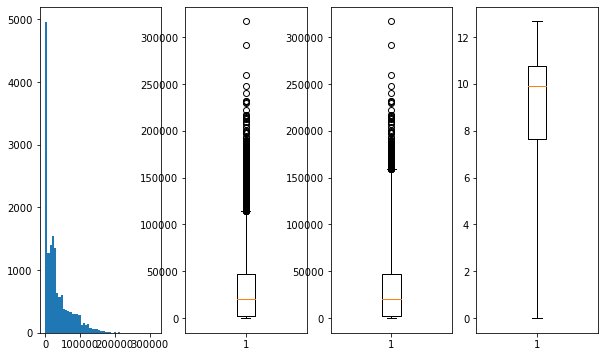

In [126]:
plt.subplot(141)
plt.hist(df.Km, bins=50)

plt.subplot(142)
plt.boxplot(df.Km)

plt.subplot(143)
plt.boxplot(df.Km, whis=2.5)

plt.subplot(144)
plt.boxplot(np.log(df.Km), whis = 2.5)
plt.show()


In [127]:
# km is a variable with a wide range of values. We can not consider the outlier values above as a real outliers. So let's keep it as it is.

# Consumption_comb

In [128]:
df.Consumption_comb.describe()

count   15919.000
mean        4.832
std         0.868
min         3.000
25%         4.100
50%         4.800
75%         5.400
max         9.100
Name: Consumption_comb, dtype: float64

In [129]:
df.Consumption_comb.sort_values().head(10)

6440    3.000
2863    3.000
2862    3.000
13493   3.000
13482   3.000
11004   3.000
11015   3.000
11044   3.000
811     3.000
6240    3.000
Name: Consumption_comb, dtype: float64

In [130]:
df.Consumption_comb.sort_values().tail(10)

3601    8.300
3649    8.300
10789   8.600
12553   8.600
12530   8.600
12422   8.600
10817   8.700
12054   8.700
12529   8.700
10771   9.100
Name: Consumption_comb, dtype: float64

#### Using our domain knowledge we can conclude that min value of 3 and max value of 9.10 are normal. But anyways, let's analyze outliers with plotting, np.log and winsorize methods.

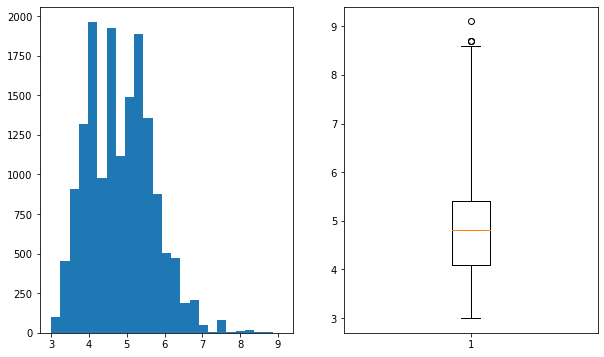

In [131]:
plt.figure(figsize = (10, 6))
plt.subplot(121)
plt.hist(df.Consumption_comb, bins = 25)

plt.subplot(122)
plt.boxplot(df.Consumption_comb, whis = 2.5)

plt.show()

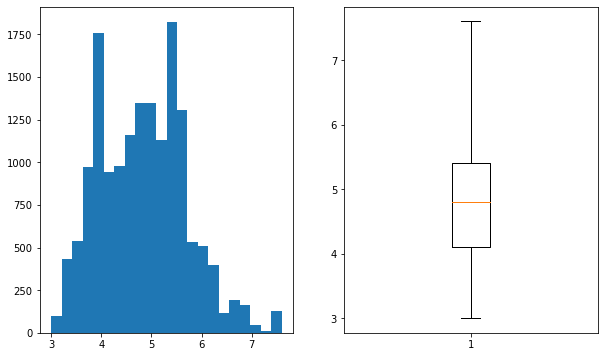

In [132]:
plt.figure(figsize = (10, 6))
plt.subplot(121)
plt.hist(winsorize(df.Consumption_comb, (0.003)), bins = 22)
# Winsorizing or winsorization is the transformation of statistics by limiting extreme values in the statistical data to reduce the effect of possibly spurious outliers. 

plt.subplot(122)
plt.boxplot(winsorize(df.Consumption_comb, (0.003)), whis = 2)

plt.show()

# Displacement_cc

In [133]:
df.Displacement_cc.describe()

count   15919.000
mean     1425.609
std       329.720
min         1.000
25%      1229.000
50%      1461.000
75%      1598.000
max     16000.000
Name: Displacement_cc, dtype: float64

In [134]:
df.sort_values(by=["Displacement_cc"], ascending = False)["Displacement_cc"].head(50)

10932   16000.000
7169    15898.000
10771    2967.000
3595     2480.000
3587     2480.000
3649     2480.000
3590     2480.000
3599     2480.000
3598     2480.000
3596     2480.000
3600     2480.000
3601     2480.000
3610     2480.000
3609     2480.000
3608     2480.000
3606     2480.000
3605     2480.000
3648     2480.000
3592     2480.000
3593     2480.000
3602     2480.000
3604     2480.000
3603     2480.000
12176    2000.000
12462    2000.000
12521    2000.000
12170    2000.000
13027    2000.000
11929    2000.000
12179    2000.000
11935    2000.000
12181    2000.000
11800    2000.000
4188     2000.000
12526    2000.000
12959    2000.000
12527    2000.000
11977    2000.000
12469    2000.000
12520    2000.000
12464    2000.000
12265    2000.000
11870    2000.000
10556    2000.000
2903     2000.000
15197    2000.000
12414    2000.000
11988    2000.000
13050    2000.000
12412    2000.000
Name: Displacement_cc, dtype: float64

In [135]:
df.sort_values(by = ["Displacement_cc"], ascending = True)["Displacement_cc"].head(55)

12790     1.000
14319     1.000
14315     1.000
12849     1.000
12848     1.000
12835     1.000
12823     1.000
12815     1.000
12800     1.000
12798     1.000
12796     1.000
12786     1.000
12783     1.000
12781     1.000
12769     1.000
12768     1.000
12750     1.000
12670     1.000
12604     1.000
12554     1.000
12501     1.000
12499     1.000
12484     1.000
12473     1.000
12467     1.000
14284     1.000
14320     1.000
14321     1.000
14314     1.000
14322     1.000
14328     1.000
14327     1.000
13904     1.000
14325     1.000
14326     1.000
14324     1.000
10559     2.000
14198     2.000
13912    54.000
10194   122.000
7810    139.000
7812    139.000
7811    139.000
7809    139.000
8128    140.000
15578   160.000
15576   160.000
15574   160.000
15575   160.000
15577   160.000
15579   160.000
13653   890.000
14694   898.000
14342   898.000
14695   898.000
Name: Displacement_cc, dtype: float64

In [136]:
outlier_bool_list = df.Displacement_cc.isin([1, 2, 54, 122, 139, 140, 160, 16000, 15898])

In [137]:
outlier_bool_list

0        False
1        False
2        False
3        False
4        False
         ...  
15914    False
15915    False
15916    False
15917    False
15918    False
Name: Displacement_cc, Length: 15919, dtype: bool

In [138]:
df.loc[outlier_bool_list, "Displacement_cc"] = np.nan

In [139]:
fill(df, "Make_Model", "Body_Type", "Displacement_cc", "mode")

Number of NaN :  0
------------------
1598.000    5077
999.000     2467
1398.000    1388
1399.000     772
1461.000     682
1229.000     678
1956.000     670
1490.000     559
1422.000     467
1197.000     372
898.000      351
1395.000     320
1968.000     301
1149.000     288
1618.000     212
1798.000     210
1498.000     196
1600.000     130
1248.000     110
1997.000     103
1364.000     102
1400.000      90
998.000       72
1500.000      50
2000.000      46
1000.000      40
1998.000      25
2480.000      20
1984.000      18
1200.000      18
899.000       11
1397.000      11
1499.000       5
929.000        5
1596.000       4
900.000        4
997.000        4
1396.000       3
1199.000       3
1599.000       3
1589.000       2
995.000        2
1300.000       2
1495.000       2
1390.000       1
1696.000       1
1568.000       1
1368.000       1
890.000        1
1239.000       1
1496.000       1
973.000        1
996.000        1
1198.000       1
1333.000       1
1584.000       1
1686.000  

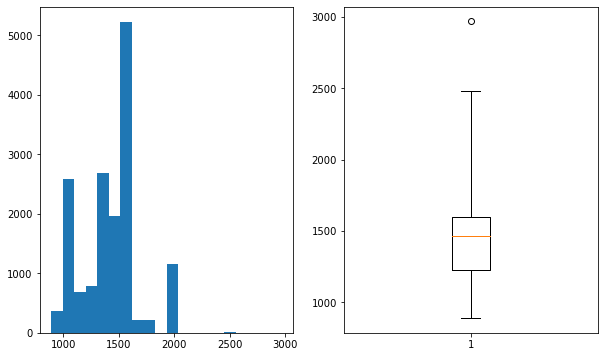

In [140]:
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.hist(df.Displacement_cc, bins = 20)

plt.subplot(122)
plt.boxplot(df.Displacement_cc, whis = 2.5)

plt.show()

## Nr_of_Doors

In [141]:
df.Nr_Of_Doors.value_counts(dropna=False)

5.000    11787
4.000     3079
3.000      832
2.000      219
7.000        1
1.000        1
Name: Nr_Of_Doors, dtype: int64

In [142]:
df.Nr_Of_Doors.replace([1,7], np.nan, inplace=True)

In [143]:
df.Nr_Of_Doors.value_counts(dropna=False)

5.000    11787
4.000     3079
3.000      832
2.000      219
NaN          2
Name: Nr_Of_Doors, dtype: int64

In [144]:
fill(df, "Make_Model", "Body_Type", "Nr_Of_Doors", "mode")

Number of NaN :  0
------------------
5.000    11789
4.000     3079
3.000      832
2.000      219
Name: Nr_Of_Doors, dtype: int64


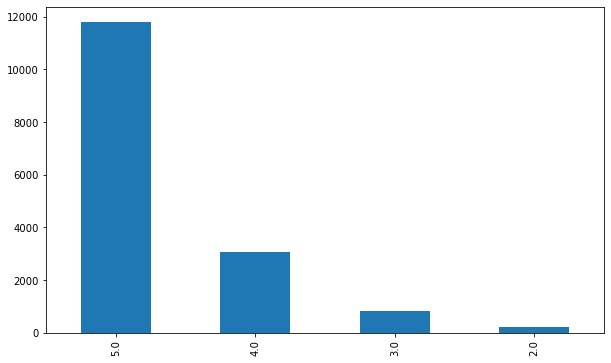

In [145]:
df.Nr_Of_Doors.value_counts(dropna=False).plot.bar();

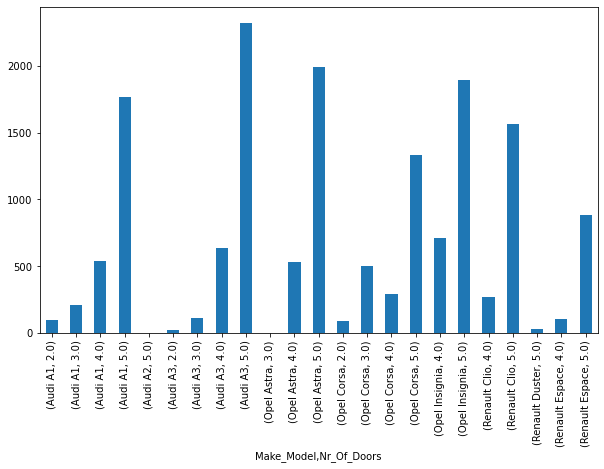

In [146]:
df.groupby(["Make_Model", "Nr_Of_Doors"])["Nr_Of_Doors"].count().plot.bar();

In [147]:
df.drop("Nr_Of_Doors", axis=1, inplace=True)

# Nr_Of_Seats

In [148]:
df.Nr_Of_Seats.value_counts(dropna = False )

5.000    14308
4.000     1127
7.000      362
2.000      119
6.000        2
3.000        1
Name: Nr_Of_Seats, dtype: int64

In [149]:
df.Nr_Of_Seats.replace([3,6],np.nan, inplace=True)

In [150]:
df.Nr_Of_Seats.value_counts(dropna = False )

5.000    14308
4.000     1127
7.000      362
2.000      119
NaN          3
Name: Nr_Of_Seats, dtype: int64

In [151]:
fill(df, "Make_Model", "Body_Type","Nr_Of_Seats", "mode")

Number of NaN :  0
------------------
5.000    14311
4.000     1127
7.000      362
2.000      119
Name: Nr_Of_Seats, dtype: int64


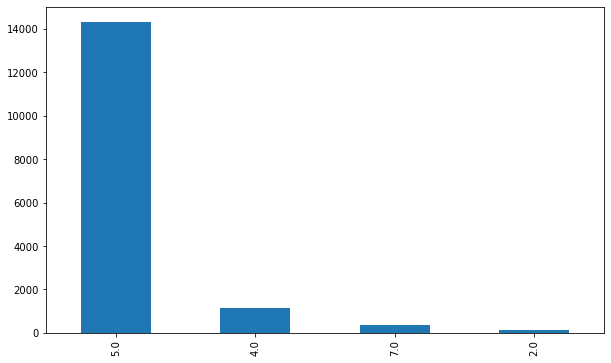

In [152]:
df.Nr_Of_Seats.value_counts(dropna = False ).plot.bar();

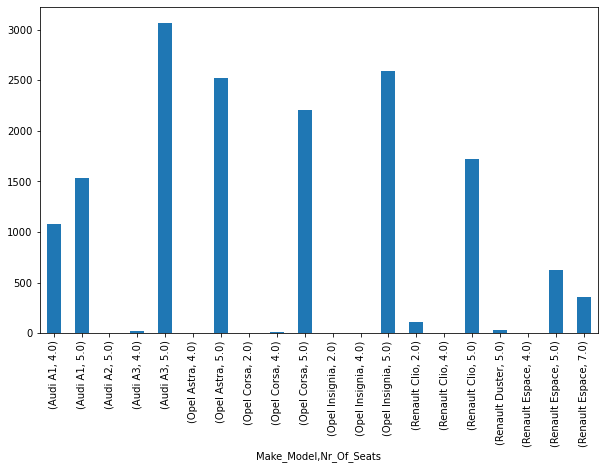

In [153]:
df.groupby(["Make_Model", "Nr_Of_Seats"])["Nr_Of_Seats"].count().plot.bar();

In [154]:
df.drop("Nr_Of_Seats", axis=1, inplace=True)

# Weight

In [155]:
df.Weight.describe()

count   15919.000
mean     1337.432
std       200.466
min         1.000
25%      1165.000
50%      1295.000
75%      1472.000
max      2471.000
Name: Weight, dtype: float64

In [156]:
df["Weight"].sort_values().head(10)

8355      1.000
12779     1.000
1143    102.000
8857    840.000
14313   900.000
13513   977.000
13555   977.000
14654   980.000
14105   980.000
13999   980.000
Name: Weight, dtype: float64

In [157]:
df["Weight"].replace([1, 102], np.nan, inplace = True)

In [158]:
df["Weight"].isnull().sum()

3

In [159]:
fill(df, "Make_Model", "Body_Type", "Weight","mode")

Number of NaN :  0
------------------
1163.000    1583
1360.000    1419
1487.000     967
1135.000     837
1425.000     744
1180.000     695
1273.000     656
1165.000     603
1503.000     561
1734.000     556
1087.000     291
1335.000     242
1365.000     211
1199.000     205
1350.000     156
1119.000     153
1355.000     136
1280.000     127
1260.000     127
1275.000     112
1278.000     110
1255.000     108
1200.000     107
1522.000     103
1659.000     102
1195.000      96
1120.000      93
1403.000      91
1701.000      87
1250.000      85
1685.000      83
1441.000      82
1308.000      80
1285.000      80
1110.000      75
1613.000      75
1279.000      72
1364.000      70
1345.000      67
1733.000      65
1071.000      64
1209.000      64
1325.000      64
1141.000      64
1230.000      63
1845.000      56
1090.000      54
1052.000      53
1664.000      52
1154.000      52
1513.000      51
1065.000      50
1237.000      49
1205.000      46
1088.000      46
1440.000      46
1265.000  

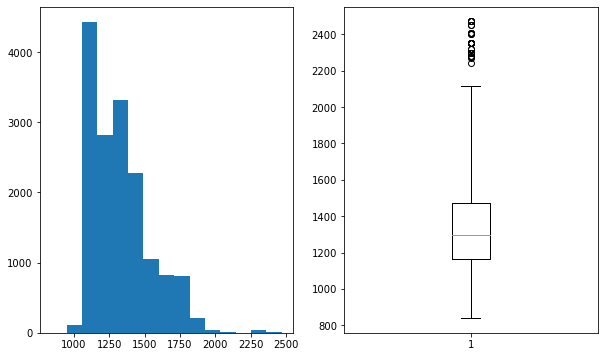

In [160]:
plt.figure(figsize=(10,6))

plt.subplot(121)
plt.hist(df.Weight, bins=15)

plt.subplot(122)
plt.boxplot(df.Weight, whis=2.5)

plt.show()

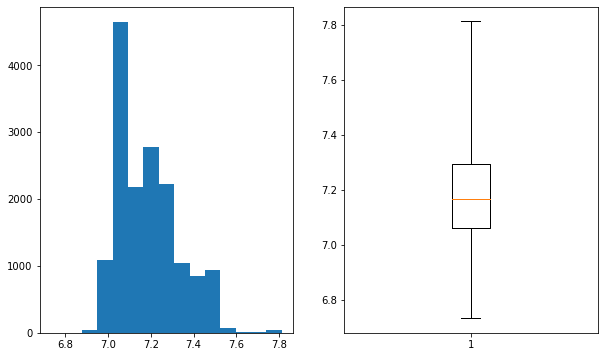

In [161]:
plt.figure(figsize=(10,6))

plt.subplot(121)
plt.hist(np.log(df.Weight), bins=15)

plt.subplot(122)
plt.boxplot(np.log(df.Weight), whis=2.5)

plt.show()

# Hp_Kw 

In [162]:
df.Hp_Kw.describe()

count   15919.000
mean       88.374
std        26.844
min         1.000
25%        66.000
50%        85.000
75%       101.000
max       294.000
Name: Hp_Kw, dtype: float64

In [163]:
df.Hp_Kw.sort_values().head(50)

6034     1.000
6946     1.000
7014     1.000
9285     1.000
9287     1.000
6005     1.000
9288     1.000
7018     1.000
9289     1.000
9290     1.000
9292     1.000
9299     1.000
10610    1.000
10580    1.000
10579    1.000
10468    1.000
15155    1.000
15156    1.000
7019     1.000
7016     1.000
13885    4.000
3913     9.000
8857    40.000
13759   40.000
8408    44.000
10282   51.000
10283   51.000
10284   51.000
10285   51.000
10286   51.000
10287   51.000
9145    51.000
10288   51.000
10346   51.000
10281   51.000
10330   51.000
9026    51.000
9025    51.000
10342   51.000
10289   51.000
9159    51.000
9384    51.000
9158    51.000
10290   51.000
10291   51.000
10345   51.000
10280   51.000
10279   51.000
10278   51.000
10264   51.000
Name: Hp_Kw, dtype: float64

In [164]:
df.Hp_Kw.unique()

array([ 66., 141.,  85.,  70.,  92., 112.,  60.,  71.,  67., 110.,  93.,
       147.,  86., 140.,  87.,  81.,  82., 135., 132., 100.,  96., 162.,
       150., 294., 228., 270., 137.,   9., 133.,  77., 101.,  78., 103.,
         1.,  74., 118.,  84.,  88.,  80.,  76., 149.,  51.,  44.,  55.,
        52.,  63.,  40.,  65.,  75., 125., 120., 184., 239., 121., 143.,
       191.,  89., 195., 127., 122., 154., 155., 104., 123., 146.,  90.,
        56.,  53.,  54., 164.,   4., 163.,  57., 119., 165., 117., 115.,
        98., 168., 167.])

In [165]:
df.Hp_Kw.loc[df.Hp_Kw < 40] = np.nan

In [166]:
df.Hp_Kw.isnull().sum()

22

In [167]:
fill(df, "Make_Model", "Body_Type", "Hp_Kw", "mode")

Number of NaN :  0
------------------
85.000     2544
66.000     2124
81.000     1403
100.000    1317
110.000    1117
70.000      890
125.000     715
51.000      703
55.000      589
118.000     552
92.000      466
121.000     392
147.000     380
77.000      353
56.000      295
54.000      276
103.000     253
87.000      232
165.000     194
88.000      177
60.000      160
162.000      98
74.000       81
96.000       72
71.000       59
101.000      47
67.000       40
154.000      39
122.000      35
119.000      30
164.000      27
135.000      24
82.000       22
52.000       22
78.000       20
146.000      18
294.000      18
141.000      16
57.000       10
120.000       8
104.000       8
191.000       7
112.000       7
155.000       6
117.000       6
184.000       5
90.000        4
65.000        4
76.000        4
98.000        3
80.000        3
93.000        3
149.000       3
168.000       3
40.000        2
86.000        2
53.000        2
228.000       2
167.000       2
143.000       2
15

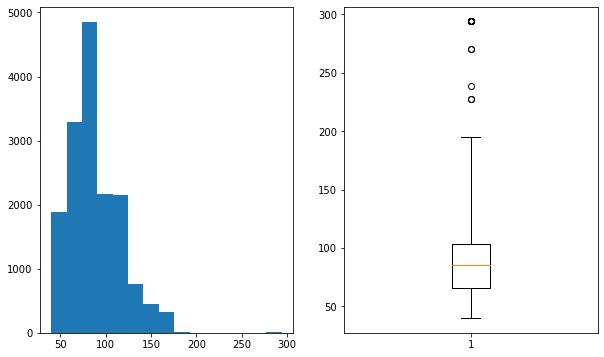

In [168]:
plt.figure(figsize=(10,6))

plt.subplot(121)
plt.hist(df.Hp_Kw, bins=15)

plt.subplot(122)
plt.boxplot(df.Hp_Kw, whis=2.5)

plt.show()

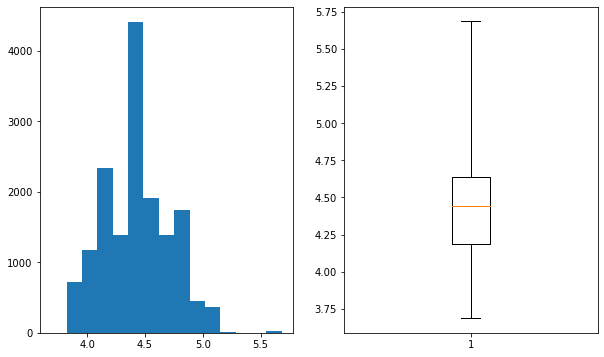

In [169]:
plt.figure(figsize=(10,6))

plt.subplot(121)
plt.hist(np.log(df.Hp_Kw), bins=15)

plt.subplot(122)
plt.boxplot(np.log(df.Hp_Kw), whis=2.5)

plt.show()

# Price

In [170]:
df.Price.describe()

count   15919.000
mean    18019.897
std      7386.169
min        13.000
25%     12850.000
50%     16900.000
75%     21900.000
max     74600.000
Name: Price, dtype: float64

In [171]:
df.Price.sort_values().head(5)

8594      13
8828     120
6066     255
8829     331
8827    4950
Name: Price, dtype: int64

In [172]:
df.drop(index = [8594, 8828, 6066,8829], axis = 0, inplace = True)

In [173]:
df.shape

(15915, 23)

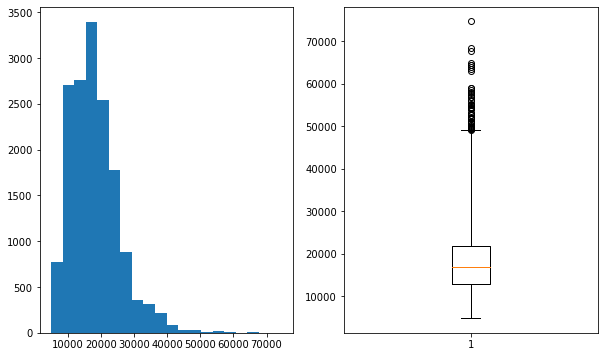

In [174]:
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.hist(df.Price, bins=20)

plt.subplot(122)
plt.boxplot(df.Price, whis=3)

plt.show()

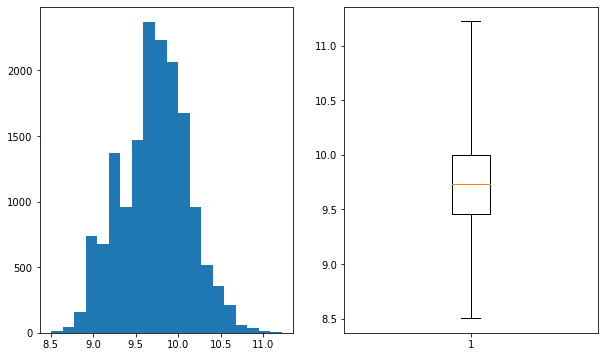

In [175]:
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.hist(np.log(df.Price), bins=20)

plt.subplot(122)
plt.boxplot(np.log(df.Price), whis=2.3)

plt.show()

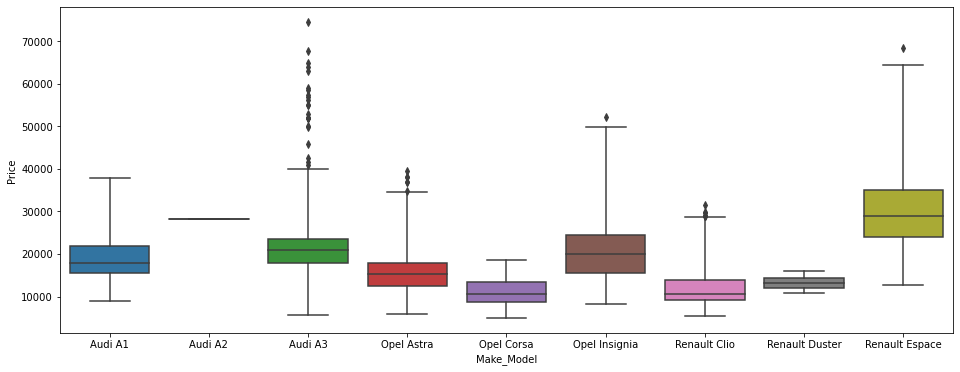

In [176]:
plt.figure(figsize=(16,6))
sns.boxplot(x="Make_Model", y="Price", data=df, whis=3)
plt.show()

# Final_Step

In [177]:
df.head().T

0  \
Make_Model                                                     Audi A1   
Body_Type                                                       Sedans   
Price                                                            15770   
Vat                                                     VAT deductible   
Km                                                           56013.000   
Hp_Kw                                                           66.000   
Type                                                              Used   
Previous_Owners                                                  2.000   
Inspection_New                                                       1   
Paint_Type                                                    Metallic   
Gearing_Type                                                 Automatic   
Displacement_cc                                               1422.000   
Weight                                                        1220.000   
Drive_Chain                                                      front   
Fuel                                                            Diesel   
Comfort_Convenience  Air conditioning,Armrest,Automatic climate con...   
Entertainment_Media  Bluetooth,Hands-free equipment,On-board comput...   
Extras                  Alloy wheels,Catalytic Converter,Voice Control   
Safety_Security      ABS,Central door lock,Daytime running lights,D...   
Gears                                                            7.000   
Age                                                              3.000   
Upholstery_Type                                                  Cloth   
Consumption_comb                                                 3.800   

                                                                     1  \
Make_Model                                                     Audi A1   
Body_Type                                                       Sedans   
Price                                                            14500   
Vat                                                   Price negotiable   
Km                                                           80000.000   
Hp_Kw                                                          141.000   
Type                                                              Used   
Previous_Owners                                                  1.000   
Inspection_New                                                       0   
Paint_Type                                                    Metallic   
Gearing_Type                                                 Automatic   
Displacement_cc                                               1798.000   
Weight                                                        1255.000   
Drive_Chain                                                      front   
Fuel                                                           Benzine   
Comfort_Convenience  Air conditioning,Automatic climate control,Hil...   
Entertainment_Media  Bluetooth,Hands-free equipment,On-board comput...   
Extras               Alloy wheels,Sport seats,Sport suspension,Voic...   
Safety_Security      ABS,Central door lock,Central door lock with r...   
Gears                                                            7.000   
Age                                                              2.000   
Upholstery_Type                                                  Cloth   
Consumption_comb                                                 5.600   

                                                                     2  \
Make_Model                                                     Audi A1   
Body_Type                                                       Sedans   
Price                                                            14640   
Vat                                                     VAT deductible   
Km                                                           83450.000   
Hp_Kw                                                           85.000 

In [178]:
numeric_col = "Price,Km,Gears,Previous_Owners,Consumption_comb,Displacement_cc,Age,Hp_Kw,Weight".split(",")

In [179]:
df_num = df[numeric_col]

In [180]:
df_num

Price        Km  Gears  Previous_Owners  Consumption_comb  \
0      15770 56013.000  7.000            2.000             3.800   
1      14500 80000.000  7.000            1.000             5.600   
2      14640 83450.000  7.000            1.000             3.800   
3      14500 73000.000  6.000            1.000             3.800   
4      16790 16200.000  7.000            1.000             4.100   
...      ...       ...    ...              ...               ...   
15914  39950  1665.262  6.000            1.000             5.300   
15915  39885  9900.000  7.000            1.000             7.400   
15916  39875    15.000  6.000            1.000             5.300   
15917  39700    10.000  6.000            1.000             5.300   
15918  40999  2085.355  6.000            1.000             6.800   

       Displacement_cc   Age   Hp_Kw   Weight  
0             1422.000 3.000  66.000 1220.000  
1             1798.000 2.000 141.000 1255.000  
2             1598.000 3.000  85.000 1135.000  
3             1422.000 3.000  66.000 1195.000  
4             1422.000 3.000  66.000 1135.000  
...                ...   ...     ...      ...  
15914         1997.000 0.000 147.000 1758.000  
15915         1798.000 0.000 165.000 1708.000  
15916         1997.000 0.000 146.000 1734.000  
15917         1997.000 0.000 147.000 1758.000  
15918         1798.000 0.000 165.000 1685.000  

[15915 rows x 9 columns]

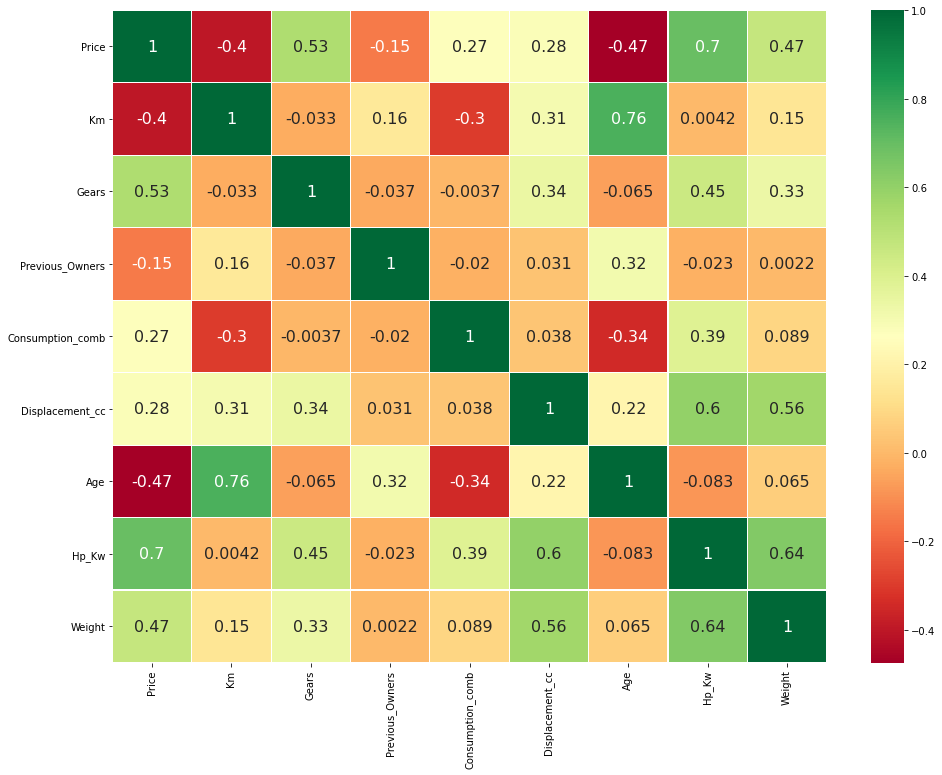

In [181]:
plt.figure(figsize = (16,12))
sns.heatmap(df_num.corr(), annot = True, cmap="RdYlGn", linewidths=0.2, annot_kws = {"size": 16});

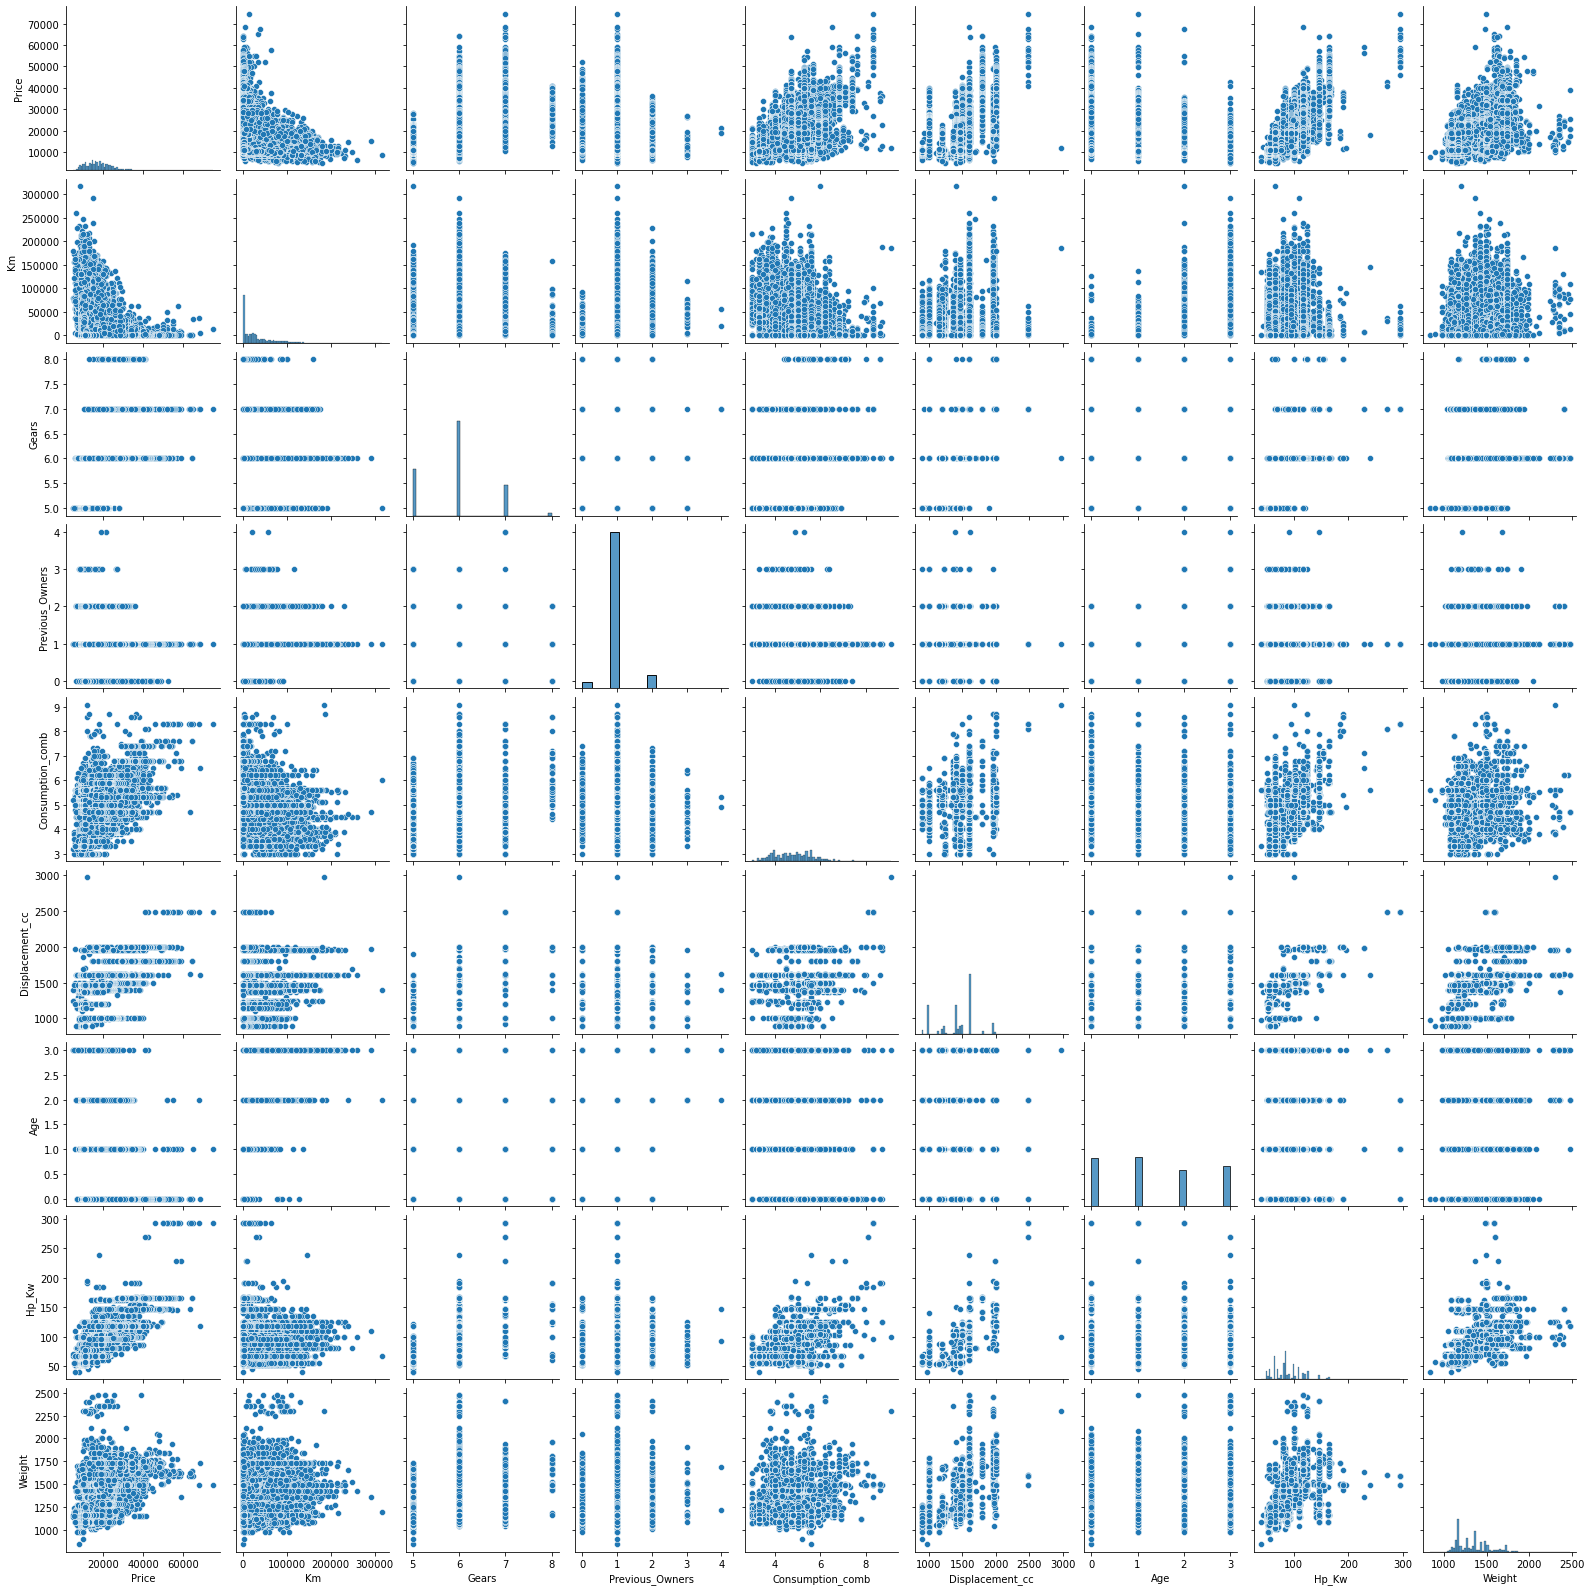

In [182]:
sns.pairplot(df_num, size = 2.5)
plt.show()

# Dummy Operation

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15915 entries, 0 to 15918
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Make_Model           15915 non-null  object 
 1   Body_Type            15915 non-null  object 
 2   Price                15915 non-null  int64  
 3   Vat                  15915 non-null  object 
 4   Km                   15915 non-null  float64
 5   Hp_Kw                15915 non-null  float64
 6   Type                 15915 non-null  object 
 7   Previous_Owners      15915 non-null  float64
 8   Inspection_New       15915 non-null  int64  
 9   Paint_Type           15915 non-null  object 
 10  Gearing_Type         15915 non-null  object 
 11  Displacement_cc      15915 non-null  float64
 12  Weight               15915 non-null  float64
 13  Drive_Chain          15915 non-null  object 
 14  Fuel                 15915 non-null  object 
 15  Comfort_Convenience  15915 non-null 

In [184]:
df.shape

(15915, 23)

In [185]:
df.to_csv("final_scout_not_dummy.csv", index=False)

In [186]:
df[["Comfort_Convenience", "Entertainment_Media", "Extras", "Safety_Security"]]

Comfort_Convenience  \
0      Air conditioning,Armrest,Automatic climate con...   
1      Air conditioning,Automatic climate control,Hil...   
2      Air conditioning,Cruise control,Electrical sid...   
3      Air suspension,Armrest,Auxiliary heating,Elect...   
4      Air conditioning,Armrest,Automatic climate con...   
...                                                  ...   
15914  Air conditioning,Automatic climate control,Cru...   
15915  Air conditioning,Automatic climate control,Cru...   
15916  Air conditioning,Armrest,Automatic climate con...   
15917  Air conditioning,Automatic climate control,Cru...   
15918  Air conditioning,Automatic climate control,Cru...   

                                     Entertainment_Media  \
0      Bluetooth,Hands-free equipment,On-board comput...   
1      Bluetooth,Hands-free equipment,On-board comput...   
2                                  MP3,On-board computer   
3      Bluetooth,CD player,Hands-free equipment,MP3,O...   
4      Bluetooth,CD player,Hands-free equipment,MP3,O...   
...                                                  ...   
15914  Bluetooth,Digital radio,Hands-free equipment,O...   
15915  Bluetooth,Digital radio,Hands-free equipment,R...   
15916  Bluetooth,Hands-free equipment,On-board comput...   
15917                  Bluetooth,Digital radio,Radio,USB   
15918                                                USB   

                                                  Extras  \
0         Alloy wheels,Catalytic Converter,Voice Control   
1      Alloy wheels,Sport seats,Sport suspension,Voic...   
2                             Alloy wheels,Voice Control   
3                 Alloy wheels,Sport seats,Voice Control   
4      Alloy wheels,Sport package,Sport suspension,Vo...   
...                                                  ...   
15914                          Alloy wheels,Touch screen   
15915            Alloy wheels,Touch screen,Voice Control   
15916                                       Alloy wheels   
15917                          Alloy wheels,Touch screen   
15918                          Alloy wheels,Touch screen   

                                         Safety_Security  
0      ABS,Central door lock,Daytime running lights,D...  
1      ABS,Central door lock,Central door lock with r...  
2      ABS,Central door lock,Daytime running lights,D...  
3      ABS,Alarm system,Central door lock with remote...  
4      ABS,Central door lock,Driver-side airbag,Elect...  
...                                                  ...  
15914  ABS,Central door lock,Central door lock with r...  
15915  ABS,Adaptive Cruise Control,Blind spot monitor...  
15916  ABS,Adaptive Cruise Control,Blind spot monitor...  
15917  ABS,Blind spot monitor,Driver-side airbag,Elec...  
15918  ABS,Blind spot monitor,Daytime running lights,...  

[15915 rows x 4 columns]

In [187]:
# STR + GET_DUMMIES

df = df.join(df["Comfort_Convenience"].str.get_dummies(sep = ",").add_prefix("cc_"))
df = df.join(df["Entertainment_Media"].str.get_dummies(sep = ",").add_prefix("em_"))
df = df.join(df["Extras"].str.get_dummies(sep = ",").add_prefix("ex_"))
df = df.join(df["Safety_Security"].str.get_dummies(sep = ",").add_prefix("ss_"))

In [188]:
df.drop(["Comfort_Convenience", "Entertainment_Media", "Extras", "Safety_Security"], axis=1, inplace=True)

In [190]:
df.shape

(15915, 113)

In [191]:
df_final = pd.get_dummies(df)

In [192]:
df_final.shape

(15915, 147)

In [193]:
len(df_final.columns)

147

In [194]:
df_final.head().T

0         1         2  \
Price                                    15770.000 14500.000 14640.000   
Km                                       56013.000 80000.000 83450.000   
Hp_Kw                                       66.000   141.000    85.000   
Previous_Owners                              2.000     1.000     1.000   
Inspection_New                               1.000     0.000     0.000   
Displacement_cc                           1422.000  1798.000  1598.000   
Weight                                    1220.000  1255.000  1135.000   
Gears                                        7.000     7.000     7.000   
Age                                          3.000     2.000     3.000   
Consumption_comb                             3.800     5.600     3.800   
cc_Air conditioning                          1.000     1.000     1.000   
cc_Air suspension                            0.000     0.000     0.000   
cc_Armrest                                   1.000     0.000     0.000   
cc_Automatic climate control                 1.000     1.000     0.000   
cc_Auxiliary heating                         0.000     0.000     0.000   
cc_Cruise control                            1.000     0.000     1.000   
cc_Electric Starter                          0.000     0.000     0.000   
cc_Electric tailgate                         0.000     0.000     0.000   
cc_Electrical side mirrors                   1.000     0.000     1.000   
cc_Electrically adjustable seats             0.000     0.000     0.000   
cc_Electrically heated windshield            0.000     0.000     0.000   
cc_Heads-up display                          0.000     0.000     0.000   
cc_Heated steering wheel                     0.000     0.000     0.000   
cc_Hill Holder                               1.000     1.000     1.000   
cc_Keyless central door lock                 0.000     0.000     0.000   
cc_Leather seats                             0.000     0.000     0.000   
cc_Leather steering wheel                    1.000     1.000     1.000   
cc_Light sensor                              1.000     0.000     0.000   
cc_Lumbar support                            0.000     1.000     0.000   
cc_Massage seats                             0.000     0.000     0.000   
cc_Multi-function steering wheel             1.000     0.000     1.000   
cc_Navigation system                         1.000     0.000     1.000   
cc_Panorama roof                             0.000     0.000     0.000   
cc_Park Distance Control                     1.000     0.000     1.000   
cc_Parking assist system camera              0.000     0.000     0.000   
cc_Parking assist system self-steering       0.000     0.000     0.000   
cc_Parking assist system sensors front       0.000     0.000     1.000   
cc_Parking assist system sensors rear        1.000     1.000     1.000   
cc_Power windows                             1.000     1.000     1.000   
cc_Rain sensor                               1.000     0.000     0.000   
cc_Seat heating                              1.000     0.000     1.000   
cc_Seat ventilation                          0.000     0.000     0.000   
cc_Split rear seats                          0.000     0.000     0.000   
cc_Start-stop system                         1.000     1.000     1.000   
cc_Sunroof                                   0.000     0.000     0.000   
cc_Tinted windows                            0.000     1.000     0.000   
cc_Wind deflector                            0.000     0.000     0.000   
cc_Windshield                                0.000     0.000     0.000   
em_Bluetooth                                 1.000     1.000     0.000   
em_CD player                                 0.000     0.000     0.000   
em_Digital radio                             0.000     0.000     0.000   
em_Hands-free equipment                      1.000     1.000     0.000   
em_MP3                                       0.000     0.000     1.000   
em_On-board computer                         1.000   

In [195]:
df_final.to_csv("final_scout_dummy.csv", index=False)